# Connected to GoogleDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Statements

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# One Hot Encoding the Target Classes

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Import Dataset

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [4]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/dataset_brain_tumor/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/dataset_brain_tumor/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

### Data shape

In [7]:
data = np.array(data)
data.shape

(2494, 128, 128, 3)

### Data reshape

In [8]:
result = np.array(result)
result = result.reshape(2494,2)

# Splitting the Data into Training & Testing

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# Model Building : CNN

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [10]:
model = Sequential()
input_shape=(128, 128, 3)
model.add(Conv2D(32, kernel_size=(2, 2), input_shape = input_shape, padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(loss = "categorical_crossentropy", optimizer='Adamax',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [12]:
y_train.shape

(1995, 2)

In [14]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
50/50 [==============================] - 4s 81ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.3375 - val_accuracy: 0.9218
Epoch 2/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0483 - accuracy: 0.9830 - val_loss: 0.3517 - val_accuracy: 0.9279
Epoch 3/30
50/50 [==============================] - 4s 80ms/step - loss: 0.0460 - accuracy: 0.9840 - val_loss: 0.4791 - val_accuracy: 0.9279
Epoch 4/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.3020 - val_accuracy: 0.9359
Epoch 5/30
50/50 [==============================] - 4s 74ms/step - loss: 0.0229 - accuracy: 0.9915 - val_loss: 0.3544 - val_accuracy: 0.9279
Epoch 6/30
50/50 [==============================] - 4s 79ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.4012 - val_accuracy: 0.9299
Epoch 7/30
50/50 [==============================] - 4s 76ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.4242 - val_accuracy: 0.9319
Epoch 8/30
50

# Plotting Losses

In [15]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


<Axes: >

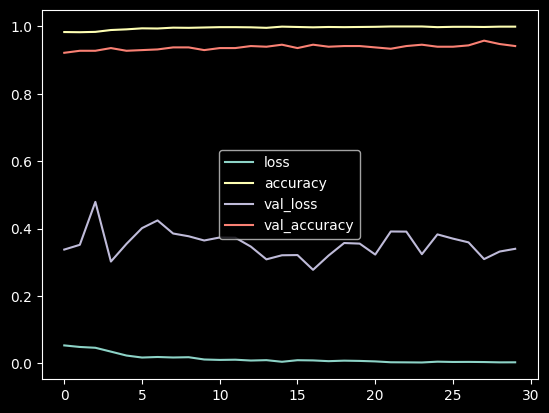

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot()

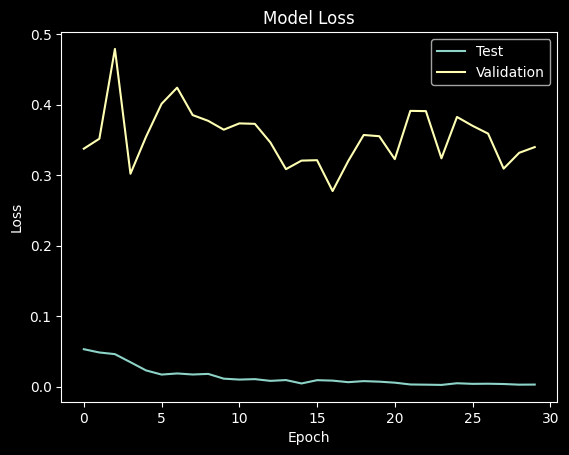

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [18]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


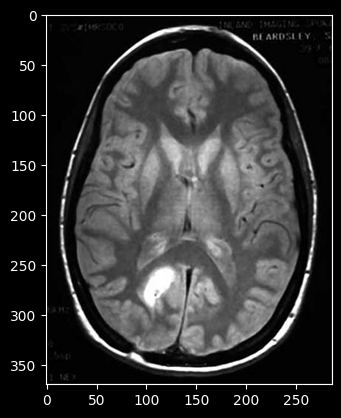

In [20]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/test1_yes.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A No, Its not a tumor


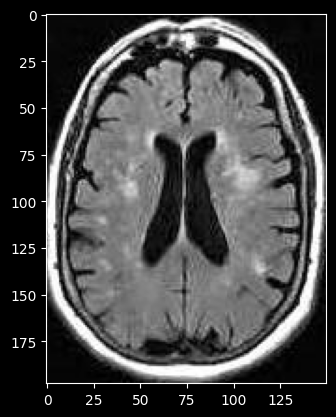

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/test_no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

100.0% Confidence This Is A Its a Tumor


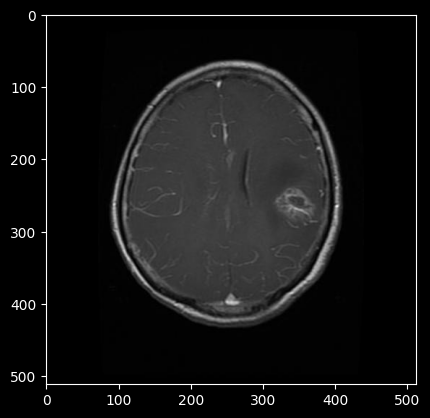

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/test_yes.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

100.0% Confidence This Is A Its a Tumor


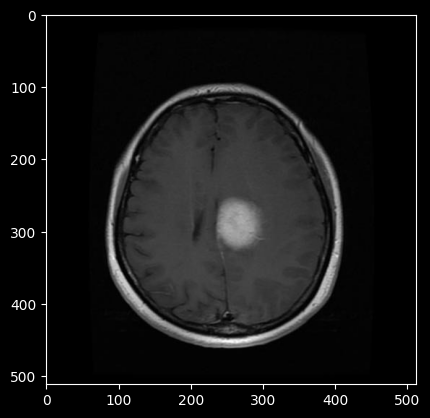

In [24]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/test3_yes.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

100.0% Confidence This Is A No, Its not a tumor


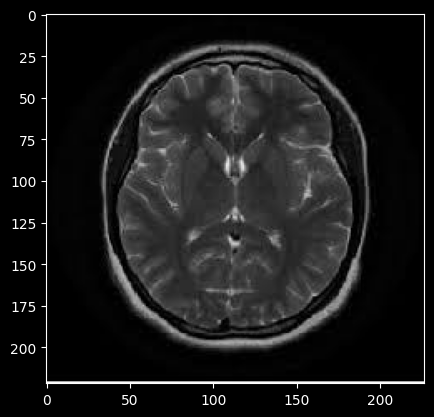

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/test2_no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

Faile

This MRI image did not diagnose, its dataset should be expanded and then trained and then tested, then it will be corrected and it will give a correct diagnosis.

99.85402822494507% Confidence This Is A No, Its not a tumor


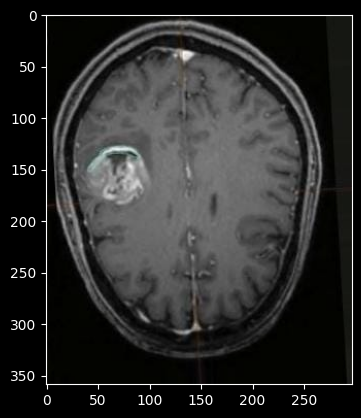

In [29]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Colab_Notebooks/Project/Brain_MRI_Tumor_detection/test4_yes.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))